In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = {
    'Size (sq ft)': [850, 900, 1200, 1500, 2000, 2300, 2600, 3000, 3400],
    'Price (Rs)': [200000, 210000, 280000, 340000, 430000, 500000, 560000, 620000, 680000]
}
df = pd.DataFrame(data)


X = df[['Size (sq ft)']]  
y = df['Price (Rs)']       

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


predicted_price = model.predict(pd.DataFrame([[2500]], columns=['Size (sq ft)']))[0]
print(f"Predicted price for 2500 sq ft house: Rs:{predicted_price:.2f}")


Mean Squared Error: 74288372.46747772
R^2 Score: 0.9982322814403931
Predicted price for 2500 sq ft house: Rs:526260.24


In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing(as_frame=True)

df = housing.frame

X = df.drop(columns=['MedHouseVal'])  
y = df['MedHouseVal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print(f"Model Accuracy: {accuracy:.2f}%")

columns = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", 
    "AveOccup", "Latitude", "Longitude"
]

sample_house = np.array([8.3252, 41, 6.984, 1.02381, 322, 126, 1.325, 37.88]).reshape(1, -1)
sample_house_df = pd.DataFrame(sample_house, columns=columns)

predicted_price = model.predict(sample_house_df)[0]

print(f"Predicted price for the sample house: Rs:{predicted_price * 100000:.2f}")



Mean Squared Error: 0.5558915986952445
R^2 Score: 0.5757877060324507
Model Accuracy: 57.58%
Predicted price for the sample house: Rs:-5037882.96


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.datasets import fetch_openml


california_housing = fetch_openml(data_id = 42165 , as_frame = True)

print(california_housing.data.columns)

X = california_housing.data
y = california_housing.target

X_numeric = X.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X_tensor, y_tensor, test_size = 0.2, random_state=42)



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super (LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_size,1)
        
    def forward(self,x):
        return self.linear(x)

In [11]:
input_size = X_train.shape[1]
model = LinearRegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr =0.01)

In [19]:
count = 50
learning_rate = 0.001

for epoch in range(count + 1):
    model.train()
    
    y_pred = model(X_train)
    
    loss = criterion(y_pred, y_train)
    
    if torch.isnan(loss).any():
        print(f"NaN detected in loss at epoch {epoch+1}")
        break

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{count}], Loss: {loss.item():.4f}')


NaN detected in loss at epoch 1


In [16]:
model.eval()

with torch.no_grad():
    y_pred_test = model(X_test)
    
mse = criterion(y_pred_test, y_test)
print(f'MSE error on Test Data: {mse.item():.4f}')


MSE error on Test Data: nan


In [17]:
y_mean = torch.mean(y_test)
ss_total = torch.sum((y_test-y_mean)**2)
ss_residual = torch.sum((y_test-y_pred_test)**2)
r_squared = 1-(ss_residual / ss_total )
print(f'R-squared : {r_squared.item():.4f}')


R-squared : nan


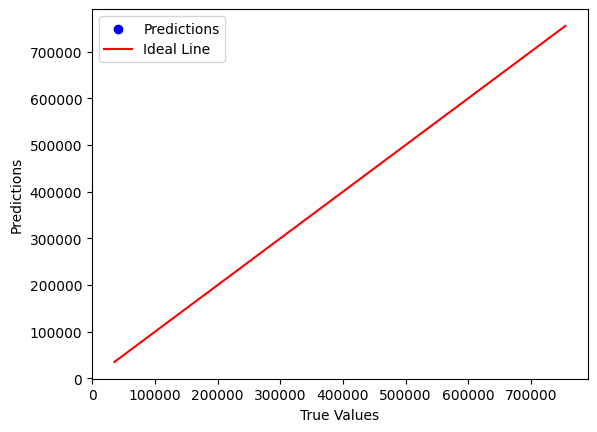

In [18]:
plt.scatter(y_test.numpy(), y_pred_test.numpy(), color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()